Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4721
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1072
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0117
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0045
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4015e-04
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8502e-04 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8339e-04
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━

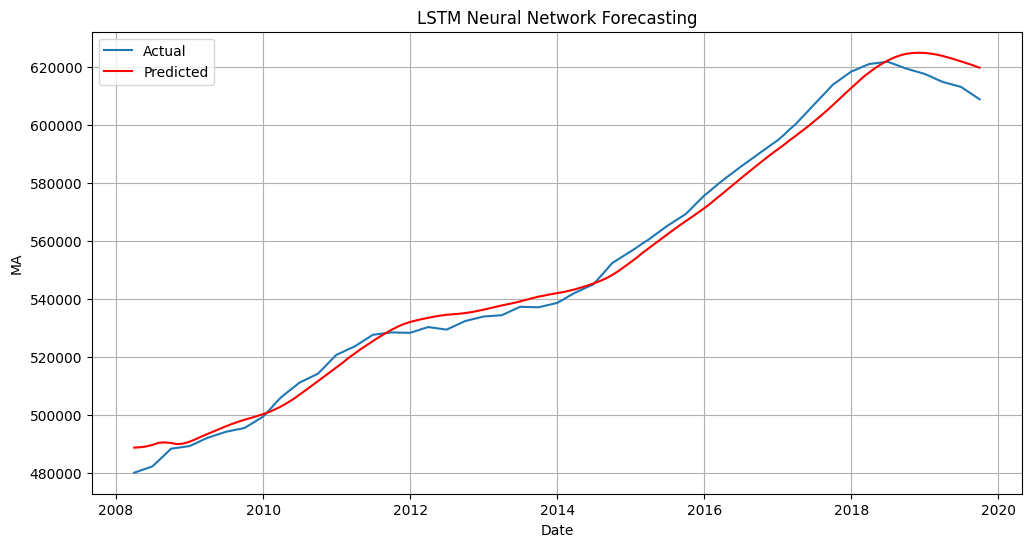

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
file_path = "/content/ma_lga_12345.csv"
df = pd.read_csv(file_path)

# Convert 'saledate' to datetime and set as index
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")
df.set_index('saledate', inplace=True)

# Use 'MA' column and resample to monthly frequency
monthly_df = df['MA'].resample('ME').mean().interpolate()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_df.values.reshape(-1, 1))

# Prepare data for LSTM
X, y = [], []
window_size = 12  # 12 months look-back
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # 3D input for LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=16, verbose=1)

# Predict
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index[window_size:], actual, label='Actual')
plt.plot(monthly_df.index[window_size:], predicted, label='Predicted', color='red')
plt.title('LSTM Neural Network Forecasting')
plt.xlabel('Date')
plt.ylabel('MA')
plt.legend()
plt.grid(True)
plt.show()
